# 문제 정의

제공 받은 Dataset은 age, anaemia, high blood pressure, diabetes 등의 병원데이터라고 추측되는 데이터이고 DEATH_EVENT는 해당 환자의 사후관리 기간 중 사망한 경우를 나타냅니다.

라이브러리 임포트

In [1]:
# Libraies for reading and handling the data
import numpy as np
import pandas as pd
import re

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Libraries for creating ML model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Library for Analysing the ML model
from sklearn import metrics

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 89 not upgraded.


데이터 준비하기

In [4]:
# csv 파일을 데이터프레임으로 변환
df = pd.read_csv('data.csv', header=None)

In [5]:
# 열 이름 지정
df.columns = ['age','anamia','creatinine_phosphokinase','diabetes','ejection_fraction',
              'high_blood_pressure','platelets','serum_creatinine','serum_sodium',
              'sex','smoking','time','DEATH_EVENT']

데이터 탐색 및 데이터 전처리

In [6]:
# column 추가로 중복된 첫 번째행 삭제
df= df.drop(0,0)
df.head()

,age,anamia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
1,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
2,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
3,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
4,50,1,111,0,20,0,210000,1.9,137,1,0,7,1
5,65,1,160,1,20,0,327000,2.7,116,0,0,8,1


In [7]:
# age 열의 자료형 변경 (문자열 -> 숫자)
df['age'].unique()

array(['75', '55', '65', '50', '90', '60', '80', '62', '45', '49', '82',
       '87', '70', '48', '68', '53', '95', '58', '94', '85', '69', '72',
       '51', '57', '42', '41', '67', '79', '59', '44', '63', '86', '66',
       '43', '46', '61', '81', '52', '64', '40', '60.667', '73', '77',
       '78', '54', '47', '56'], dtype=object)

In [8]:
# 60.667를 np.nan으로 변경
df['age'].replace('60.667',np.nan,inplace=True)
df.info

<bound method DataFrame.info of     age anamia creatinine_phosphokinase diabetes  ... sex smoking time DEATH_EVENT
1    75      0                      582        0  ...   1       0    4           1
2    55      0                     7861        0  ...   1       0    6           1
3    65      0                      146        0  ...   1       1    7           1
4    50      1                      111        0  ...   1       0    7           1
5    65      1                      160        1  ...   0       0    8           1
..   ..    ...                      ...      ...  ...  ..     ...  ...         ...
295  62      0                       61        1  ...   1       1  270           0
296  55      0                     1820        0  ...   0       0  271           0
297  45      0                     2060        1  ...   0       0  278           0
298  45      0                     2413        0  ...   1       1  280           0
299  50      0                      196        0  ...  

In [9]:
# nan 확인
df['age'].unique()

array(['75', '55', '65', '50', '90', '60', '80', '62', '45', '49', '82',
       '87', '70', '48', '68', '53', '95', '58', '94', '85', '69', '72',
       '51', '57', '42', '41', '67', '79', '59', '44', '63', '86', '66',
       '43', '46', '61', '81', '52', '64', '40', nan, '73', '77', '78',
       '54', '47', '56'], dtype=object)

In [10]:
# 데이터안 nan값 60으로 변경
df=df.fillna(60)

In [11]:
# 변경 사항 확인
df['age'].unique()

array(['75', '55', '65', '50', '90', '60', '80', '62', '45', '49', '82',
       '87', '70', '48', '68', '53', '95', '58', '94', '85', '69', '72',
       '51', '57', '42', '41', '67', '79', '59', '44', '63', '86', '66',
       '43', '46', '61', '81', '52', '64', '40', 60, '73', '77', '78',
       '54', '47', '56'], dtype=object)

In [12]:
# 열들의 자료형 변경 (문자열 -> 숫자)
df['age']=df['age'].astype('int')

df['creatinine_phosphokinase']=df['creatinine_phosphokinase'].astype('int')

df['ejection_fraction']=df['ejection_fraction'].astype('int')

df['platelets']=df['platelets'].astype('float')

df['serum_creatinine']=df['serum_creatinine'].astype('float')

df['serum_sodium']=df['serum_sodium'].astype('int')

df['time']=df['time'].astype('int')

df['DEATH_EVENT']=df['DEATH_EVENT'].astype('int')

In [13]:
# 숫자 형태의 변수 -> 카테고리 형태로 변경
categorical_var=['anamia','diabetes','high_blood_pressure','sex','smoking']
df[categorical_var] = df[categorical_var].astype('category')

형변환 완료한 데이터 형식

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 1 to 299
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       299 non-null    int64   
 1   anamia                    299 non-null    category
 2   creatinine_phosphokinase  299 non-null    int64   
 3   diabetes                  299 non-null    category
 4   ejection_fraction         299 non-null    int64   
 5   high_blood_pressure       299 non-null    category
 6   platelets                 299 non-null    float64 
 7   serum_creatinine          299 non-null    float64 
 8   serum_sodium              299 non-null    int64   
 9   sex                       299 non-null    category
 10  smoking                   299 non-null    category
 11  time                      299 non-null    int64   
 12  DEATH_EVENT               299 non-null    int64   
dtypes: category(5), float64(2), int64(6)
memory usage:

In [15]:
df.head()

,age,anamia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
1,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
2,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
3,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
4,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
5,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


데이터 분리하기

In [16]:
# X(시험지), y(정답지) 분리하기
X = df.iloc[:,:-1]
y = df['DEATH_EVENT']

데이터 시각화

In [17]:
# 원-핫 인코딩 처리
# 컬럼 -> 원-핫 인코딩 처리
temp = pd.get_dummies(X[categorical_var], drop_first=True)

In [18]:
# 기존 데이터랑 합치기
X_modified = pd.concat([X,temp], axis=1)

In [19]:
# 기존 컬럼 삭제
X_modified.drop(categorical_var, axis=1, inplace=True)

In [20]:
X_modified.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anamia_1,diabetes_1,high_blood_pressure_1,sex_1,smoking_1
1,75,582,20,265000.00,1.9,130,4,0,0,1,1,0
2,55,7861,38,263358.03,1.1,136,6,0,0,0,1,0
3,65,146,20,162000.00,1.3,129,7,0,0,0,1,1
4,50,111,20,210000.00,1.9,137,7,1,0,0,1,0
5,65,160,20,327000.00,2.7,116,8,1,1,0,0,0


훈련용, 테스트 데이터 분리하기

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_modified,y,
                                                    train_size=0.7, # test_size
                                                    random_state=7)

KNN 분류 모형 - sklearn 사용

In [22]:
# sklearn 라이브러리에서 KNN 분류 모형 가져오기
from sklearn.neighbors import KNeighborsClassifier

# 모형 객체 생성 (k=2로 설정)
knn = KNeighborsClassifier(n_neighbors=2)

In [23]:
# train 데이터를 사용하여 모형 학습
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [24]:
# test 데이터를 가지고 y_hat을 예측 (분류)
y_hat = knn.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 1 0]


모델 성능 평가

In [25]:
from sklearn import metrics

# 모형 성능 평가- 평가지표 계산
knn_report = metrics.classification_report(y_test, y_hat)
print("테스트 평가지표 n_neighbors=2")
print(knn_report)

테스트 평가지표 n_neighbors=2
              precision    recall  f1-score   support

           0       0.74      0.98      0.85        65
           1       0.75      0.12      0.21        25

    accuracy                           0.74        90
   macro avg       0.75      0.55      0.53        90
weighted avg       0.75      0.74      0.67        90



In [26]:
# sklearn 을 이용하면 전부 계산해준다.
print('accuracy: ', metrics.accuracy_score(y_test,y_hat))
print('precision: ', metrics.precision_score(y_test,y_hat))
print('recall: ', metrics.recall_score(y_test,y_hat))
print('f1: ', metrics.f1_score(y_test,y_hat))

accuracy:  0.7444444444444445
precision:  0.75
recall:  0.12
f1:  0.20689655172413793


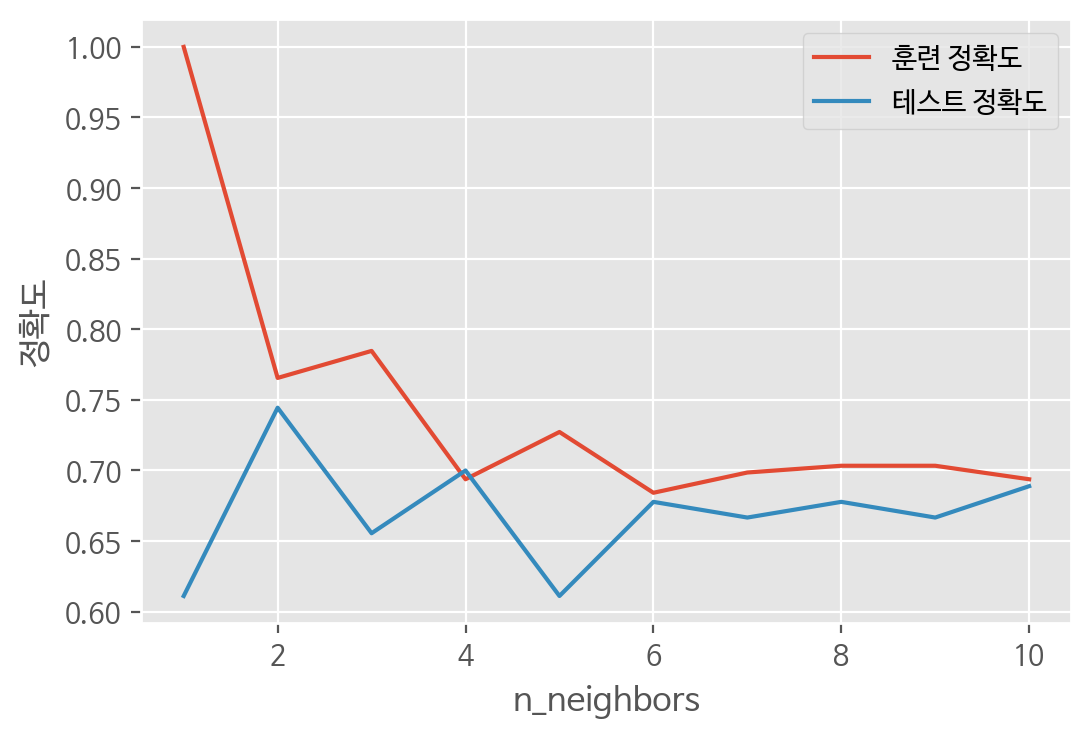

In [27]:
#이웃의 수에 따른 정확도 저장할 리스트 변수

train_accuracy = []
test_accuracy = []

# 1에서 10까지 n_nerighbors를 적용
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings :

  # 모델 생성
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)

  #훈련 세트 정확도 저장
  train_accuracy.append(clf.score(X_train, y_train))

  #테스트 세트 정확도 저장
  test_accuracy.append(clf.score(X_test, y_test))

# 훈련 vs 테스트 정확도 시각화
plt.figure(dpi = 100)
plt.style.use('ggplot')
plt.rc('font', family = 'NanumBarunGothic')

plt.plot(neighbors_settings,train_accuracy, label='훈련 정확도')
plt.plot(neighbors_settings,test_accuracy, label='테스트 정확도')
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()